In [3]:
import pandas as pd
data = pd.read_csv('consumo_eletrico_brasil.csv', encoding='utf-8', delimiter=',')


In [4]:
data.columns

Index(['Unnamed: 0', 'sistema_costeiro', 'bioma', 'area', 'populacao',
       'temp_media', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [8]:
features = data[['sistema_costeiro', 'bioma', 'area', 'populacao', 'temp_media', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020']]

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
data['sistema_costeiro'] = data['sistema_costeiro'].fillna('missing')
data['bioma'] = data['bioma'].fillna('missing')

In [11]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(data[['sistema_costeiro', 'bioma']])

# Criar DataFrame para colunas codificadas
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['sistema_costeiro', 'bioma']))

# Concatenar com o DataFrame original e remover coluna original
df = pd.concat([data.drop(['sistema_costeiro', 'bioma'], axis=1), one_hot_df], axis=1)

# Exibir o DataFrame resultante
df


,area,populacao,temp_media,2006,2007,2008,2009,2010,2011,2012,...,bioma_caatinga_cerrado,bioma_caatinga_cerrado_mata_atlantica,bioma_caatinga_mata_atlantica,bioma_cerrado,bioma_cerrado_mata_atlantica,bioma_cerrado_pantanal,bioma_mata_atlantica,bioma_mata_atlantica_pampa,bioma_pampa,bioma_pantanal
0,"535,682",6386,"23,00","0,00","0,00","0,00","0,00","0,00","0,00","0,12",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,"63,883",3104,"23,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,"54,811",1972,"22,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,"79,333",7154,"22,00","0,00","0,00","0,00","0,00","652,56","678,38","695,36",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,"106,853",10225,"22,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,"1121,928",4407,"22,00","25259,86","22600,53","23536,66","24633,45","29666,51","36193,90","37163,02",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3840,"1905,744",3332,"22,00","25353,02","22679,17","23617,24","24716,86","29770,06","36325,93","37295,16",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3841,"11553,479",9056,"22,00","25446,18","22757,81","23697,82","24800,27","29873,61","36457,96","37427,31",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3842,"5139,307",9375,"22,00","25539,34","22836,45","23778,40","24883,67","29977,15","36589,99","37559,46",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

C:\Users\natas\AppData\Local\Temp\ipykernel_3948\1681250148.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)


In [13]:
X = df.to_numpy()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

In [16]:
from sklearn.metrics import silhouette_score

# Calcular o Silhouette Score
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.94


In [17]:
df['Cluster'].value_counts()

Cluster
0    3774
2      44
3      25
1       1
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.metrics import accuracy_score
# Selecionar características e rótulos
X = df[['area', 'populacao', 'temp_media', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', 'sistema_costeiro_Pertence',
       'sistema_costeiro_n_pertence', 'sistema_costeiro_pertence',
       'bioma_amazonia', 'bioma_amazonia_cerrado',
       'bioma_amazonia_cerrado_pantanal', 'bioma_amazonia_pantanal',
       'bioma_caatinga', 'bioma_caatinga_cerrado',
       'bioma_caatinga_cerrado_mata_atlantica',
       'bioma_caatinga_mata_atlantica', 'bioma_cerrado',
       'bioma_cerrado_mata_atlantica', 'bioma_cerrado_pantanal',
       'bioma_mata_atlantica', 'bioma_mata_atlantica_pampa', 'bioma_pampa',
       'bioma_pantanal', 'Cluster']]  # Adicione o cluster como característica
y = df['Cluster']  

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred = rf.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Random Forest: {accuracy:.2f}')

Acurácia do Random Forest: 1.00


In [20]:
from sklearn.model_selection import cross_val_score

# Avaliar o modelo usando validação cruzada
cv_scores = cross_val_score(rf, X, y, cv=5)  # cv é o número de folds
print(f'Scores de validação cruzada: {cv_scores}')
print(f'Média da acurácia: {cv_scores.mean():.2f}')

C:\Users\natas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Scores de validação cruzada: [0.99609883 1.         1.         0.99869961 1.        ]
Média da acurácia: 1.00


In [21]:
importances = rf.feature_importances_
feature_names = X.columns

# Criar um DataFrame para visualizar a importância das características
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)


                                  Feature  Importance
36                                Cluster    0.304630
1                               populacao    0.233030
6                                    2009    0.048619
10                                   2013    0.040329
34                            bioma_pampa    0.039827
7                                    2010    0.032328
4                                    2007    0.028172
11                                   2014    0.027991
8                                    2011    0.027187
0                                    area    0.025541
13                                   2016    0.022819
9                                    2012    0.022511
16                                   2019    0.021574
12                                   2015    0.021387
2                              temp_media    0.020086
14                                   2017    0.017716
5                                    2008    0.017451
3                           

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1138    0    0]
 [   0    9    0]
 [   0    0    7]]


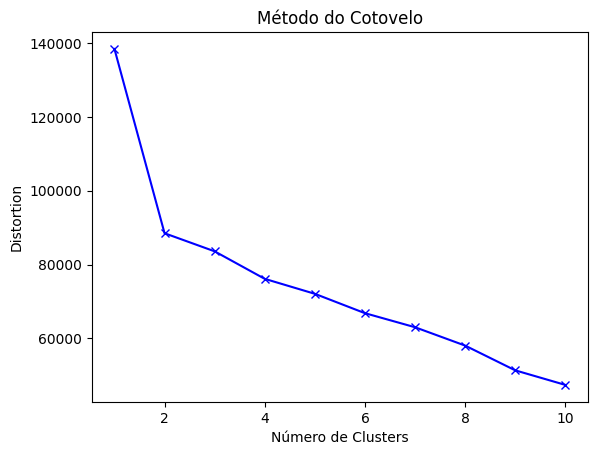

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Método do Cotovelo
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distortion')
plt.title('Método do Cotovelo')
plt.show()

In [28]:
from sklearn.cluster import KMeans

# Tentar diferentes números de clusters
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Verificar o número de clusters formados
unique_clusters = len(set(clusters))
print(f'Número de clusters formados: {unique_clusters}')

if unique_clusters > 1:
    # Avaliar o modelo
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print('Não há clusters suficientes para calcular o Silhouette Score.')


Número de clusters formados: 2
Silhouette Score: 0.98
